![imagen](img/python.jpg)

## Sesión 10: Inyección de Dependencias

**Inyección de Dependencias**  <u>instancia objetos automáticamente y aquellos de los que dependen.</u>

Proporcionamos la declaración de cómo se debe crear un objeto.<br>
**Inyección de Dependencias** resuelve todas las cadenas de dependencias y crea los objetos en tiempo de ejecución.

**FastAPI** nos permite declarar los objetos y variables que queremos tener.<br>
 Los declaramos en los argumentos de la función de operación de ruta.


**Inyección de Dependencias** es óptima si necesitamos obtener o validar datos, hacer comprobaciones de seguridad, o llamar a lógica externa muchas veces.

#### 10.1 Algunos ejemplos
#### 10.1.1 Header

`Header`, ¡recupera el `user-agent`, por favor!


```python
from fastapi import FastAPI, Header

app = FastAPI()


# Usamos la función Header para obtener el encabezado user-agent
# No sabemos cómo maneja las operaciones necesarias 

# Es como decir "Header, haz lo tuyo y dame el user-agent"
 
@app.get("/")
async def my_header(user_agent: str = Header(...)): 
    return {"user_agent": user_agent}
```

Obtenemos el siguiente resultado:

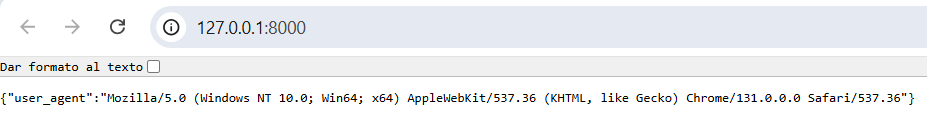



#### 10.1.2 Depends

`Depends` usará la dependencia que definamos en una función.


```python
from fastapi import Depends, FastAPI

app = FastAPI()


# skip y limit son parámetros de consulta
async def pagination(skip: int = 0, limit: int = 10) -> tuple[int, int]:
    return (skip, limit)


# Depends usa la función pagination
@app.get("/items")
async def list_items(p: tuple[int, int] = Depends(pagination)):
    skip, limit = p
    return {"skip": skip, "limit": limit}


# Reutilizamos la función pagination
@app.get("/things")
async def list_things(p: tuple[int, int] = Depends(pagination)):
    skip, limit = p
    return {"skip": skip, "limit": limit}
```

Observa la ejecución:

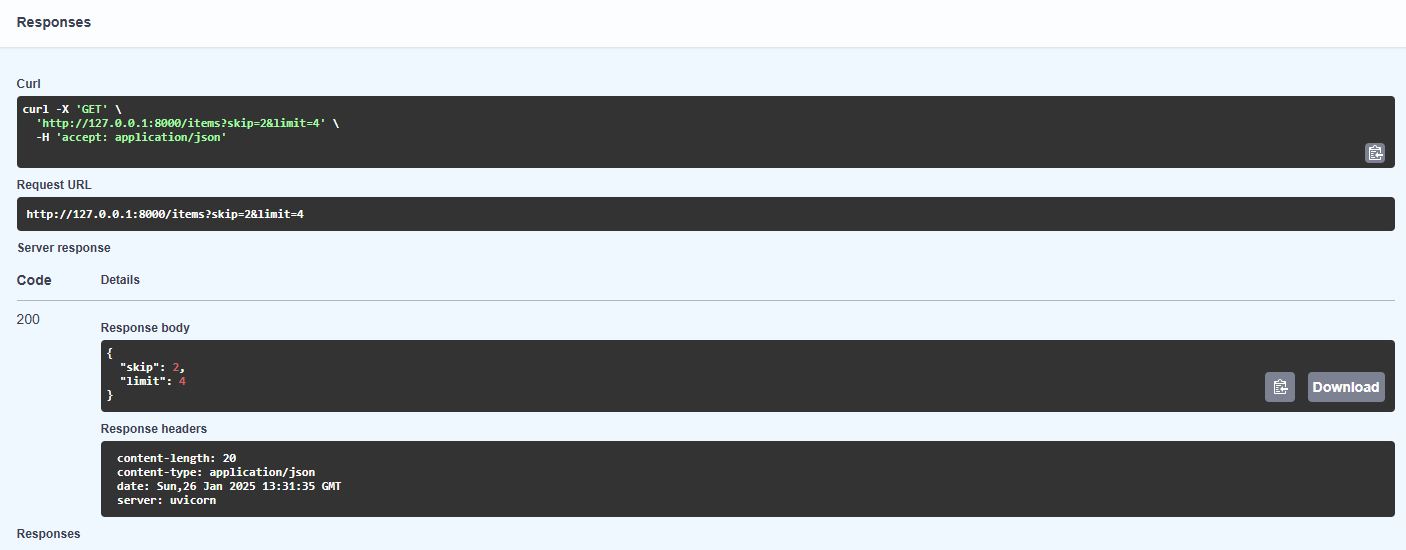


<u>Anotación de tipo del valor de retorno de una dependencia</u>

Tenemos que anotar el tipo del resultado de la dependencia en los argumentos de la operación de ruta.

```python
p: tuple[int, int] = Depends(pagination)
```

#### 10.1.3 Depends y Query

Veamos la combinación de `Depends` y `Query`.

```python
from fastapi import Depends, FastAPI, Query

# Inyección de Dependencias: Depends y Query

app = FastAPI()


async def pagination(
    skip: int = Query(0, ge=0),  # skip >= 0 , por defecto 0
    limit: int = Query(25, ge=0),  # limit >= 0 , por defecto 25
) -> tuple[int, int]:
    excerpt_limit = min(200, limit)
    return (skip, excerpt_limit)


# Depends usa pagination
# pagination usa Query


@app.get("/items")
async def list_items(p: tuple[int, int] = Depends(pagination)):
    skip, limit = p
    return {"skip": skip, "limit": limit}


@app.get("/things")
async def list_things(p: tuple[int, int] = Depends(pagination)):
    skip, limit = p
    return {"skip": skip, "limit": limit}

```

Observa la ejecución:

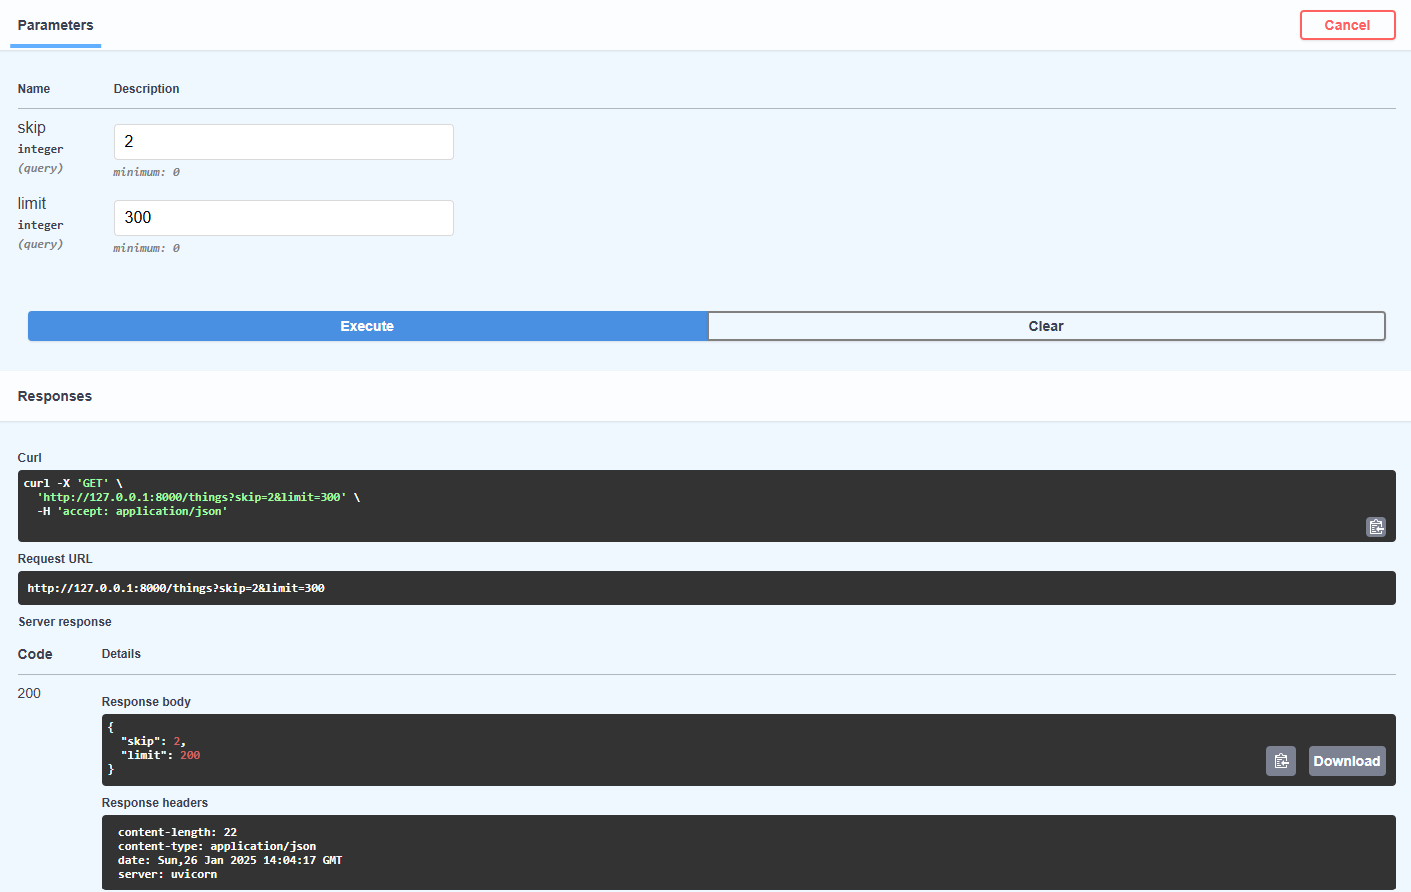

#### 10.2 Dependencias usando Clases

**Inyección de Dependencias** se puede aplicar con funciones, como hemos visto.<br>
**Inyección de Dependencias** también se puede aplicar con <u> clases invocables </u>.

Con funciones no podemos usar argumentos dinámicamente.

En el ejemplo anterior, el valor límite es 200. ¿Cómo podríamos cambiar esto para hacerlo dinámico?

```python
from fastapi import Depends, FastAPI, Query

app = FastAPI()


class Pagination:
    def __init__(self, maximum_limit: int = 200):
        self.maximum_limit = maximum_limit

    # Clase invocable, ¡la Inyección de Dependencias usará esto!
    async def __call__(
        self,
        skip: int = Query(0, ge=0),
        limit: int = Query(25, ge=0),
    ) -> tuple[int, int]:
        excerpt_limit = min(self.maximum_limit, limit)
        return (skip, excerpt_limit)


pagination = Pagination(maximum_limit=150)  # ¡cambiado!


@app.get("/items")
async def list_items(p: tuple[int, int] = Depends(pagination)):
    skip, limit = p
    return {"skip": skip, "limit": limit}


@app.get("/things")
async def list_things(p: tuple[int, int] = Depends(pagination)):
    skip, limit = p
    return {"skip": skip, "limit": limit}


```

Observa la ejecución:

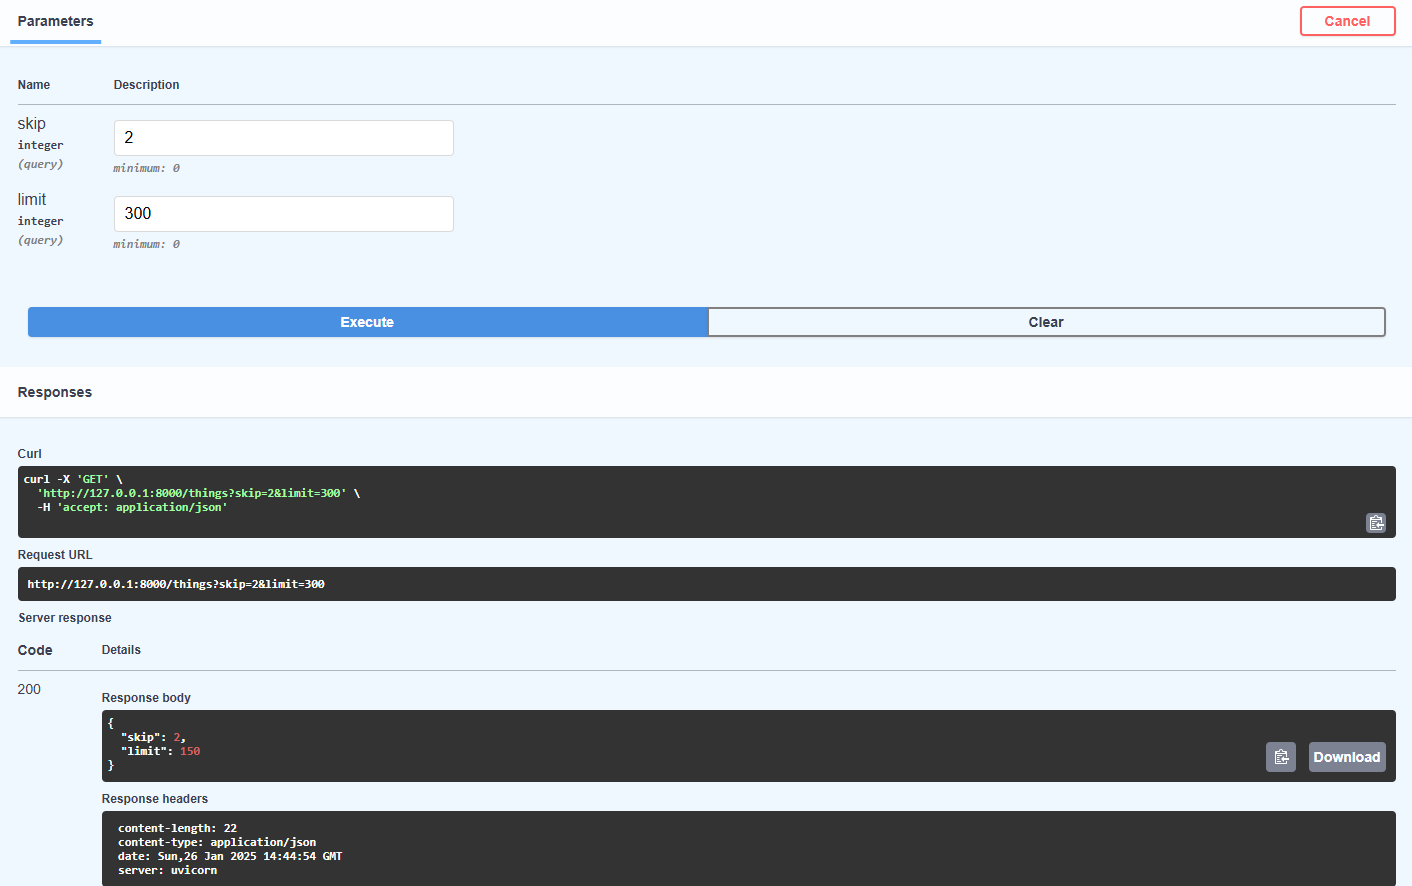

Hasta ahora hemos aprendido a entender qué es la **Inyección de Dependencias** y cómo podemos aplicarla en **FastAPI**.